<a href="https://colab.research.google.com/github/tonypacheco223/LogisticRegression/blob/main/RamireTonyMA421Homework3Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this homework, you will write a python implementation of logistic regression. You will test it on two datasets. 
First we import some libraries that we need. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

We define some functions involved. Use the formulations that avoid overflows.  
1. sigmoid function sigmoid(t)
2. log of sigmoid(t), called log_sig(t)
3. log of 1-sigmoid = 1/(1+e^t), called log_one_sig(t)
4. cross-entropy loss function given the inputs of label y and prediction y_hat, where y and y_hat are vectors of dimension N. (N = # of data points.)

In [ ]:
from numpy.core.fromnumeric import size
def sigmoid(t):
  return (1 / (1 + np.exp(-t)))

#Computer Loss of Sigmoid.  
#This function takes vector inputs. y, y_hat
def loss(y, zVal):
  crossEntropy = 0
  total = 0
  for val in range(0, y.shape[0]):
    crossEntropy = y[val]*log_sig(zVal[val]) + (1 - y[val])*log_one_sig(zVal[val])
    total += crossEntropy

  total /= y.shape[0]
  # print(f"Total Loss : {total}")
  return total

def log_sig(t):
  if t <= 0:
    return (-t + np.log(1 + np.exp(t)))
  else:
    return np.log(1 + np.exp(-t))
#Two Cases
def log_one_sig(t):
  if t <=0:
    return - np.log(1 / (1 + np.exp(t)))
  else:
    return  t + - np.log(1 / (1 + np.exp(-t)))


Define the model output given the data input X (n-byN matrix) and the model parameters w (n-dimensional weigth vector) and b (bias)

In [ ]:
#Given input X -> n-byN matrix. W and B is weight and bias. 
#y_hat = model(w,b,X_train)
# w : [w1, w2, w3, ... , n]
# b : Scalar
# X : [ [x1, x2, x3,..., n] , [x1, x2, x3,..., n], ... , m]  :  m * n 
# m -> rows (objects) ; n -> columns (features)
def model(w,b,X):
  #y_hat = sigmost(z) ; z = W * X  + b
  yPredicted = []
  z = []
  for row in range(0,X.shape[0]):
    z = (np.dot(np.transpose(w)[0], X[row]) + b)
    yPredicted.append(sigmoid(z))
  
  return np.array(yPredicted)
  



Define the function that computes the gradient of the cross-entropy loss given the label y (N-vector), the model output y_hat (N-vector), and the dataset X (n-by-N matrix). It's probably easier to return the gradients with respect w and b separately, which can be used to update w and b later on. 

In [ ]:

def gradients(X, y, y_hat):
  numRows = X.shape[0]
  gradWeight = (np.dot(np.transpose(X) , (y_hat - y)))/numRows
  gradBias = (np.dot(np.ones(numRows) , (y_hat - y))) / numRows
  # weights = ((np.transpose(X) * (y_hat - y)))/numRows
  # bias = ((np.ones(numRows) * (y_hat - y))) / numRows
  return gradBias, np.transpose([gradWeight])




  
    

Write the function that minimizes the loss (i.e. training) by the gradient descent algorithm using a fixed number of iteration (*iter*) and learning rate (*lr*). Your function should take *iter* and *lr* as well as the initial weight w, initial bias b, the input data X and the label y as the inputs. It produces new w and b as output. Also compute the loss value at each iteration and output the sequence of the loss.

In [ ]:
def getZVal(X, w, b):
  z = []
  for row in range(0,X.shape[0]):
    z.append(np.dot(np.transpose(w)[0], X[row]) + b)
  return np.array(z)


In [ ]:
#Optimize and Chaining Are the same in ML
#Initial wight, bias, X vecotr and Y 
#Number of Iterations and Learning Rate
#Output : Optimize W, B and then compute the loss value at each iteration and output the sequence of the loss. 

def train(w, b, X, y, iter, lr):
  EntropyLossLog = []
  EntropyLoss = loss(y,getZVal(X, w, b))
  print(EntropyLoss, iter)
  EntropyLossLog.append(EntropyLoss)
  while iter != 0 :
    gradientBias, gradientWeights = gradients(X, y.squeeze(), model(w,b,X))
    w = w - (lr * gradientWeights)
    b = b - (lr * gradientBias)
    iter -= 1
    EntropyLoss = loss(y.squeeze(),getZVal(X, w, b))
    print(EntropyLoss, iter)
    EntropyLossLog.append(EntropyLoss)
  return w, b, np.array(EntropyLossLog)

# def train(w, b, X, y, iter, lr):
#   logLoss = []
#   while iter != 0:
#     b, w = gradients(X, y, model(w,b,X))
#     w = w - (lr * w)
#     b = b - (lr * b)
#     logLoss.append(loss(y, getZVal(X, w, b)))

#     iter -= 1
#   return b, w, np.array(logLoss)


    
    


1. Write the function that uses a trained model to produce class prediction (o or 1) for an input dataset X, i.e. turn the model output y_hat = model(w,b,X) into predicted label y_label (N-vector of 0 or 1). 
2. For an input dataset X with a known label y (e.g. a training or testing dataset) and a predicted label y_label, compute the accuracy of prediction (i.e. # correct predictions/N)

In [ ]:
#Take the prediction and produce an output of a class label. 
def predict(y_hat):
  predictList = []
  for row in y_hat :
    if row >= 0.5 :
      predictList.append(1)
    else:
      predictList.append(0)
  return np.array(predictList)
    


#Find the accuracy given a y value and predicted y value. 
def accuracy(y, y_label):
  TruePosNeg = 0
  for row in range(0, y.shape[0]):
    if y[row] == y_label[row]:
      TruePosNeg += 1
  return TruePosNeg / y_label.shape[0]

      
    

We are ready to test your programs on some datasets. First, we use a synthetic dataset generated using [scikit-learn](https://scikit-learn.org/stable/datasets.html) package. We generate a dataset for training and simultaneously a dataset for testing.

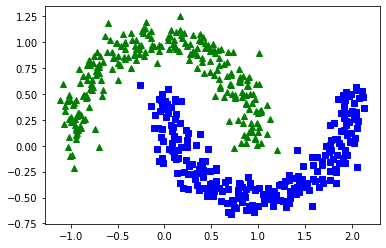

In [ ]:
from sklearn.datasets import make_moons
X_train, y_train = make_moons(n_samples=500, noise=0.1)
X_test, y_test = make_moons(n_samples=1000, noise=0.1)

plt.figure()
plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "g^")
plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs")



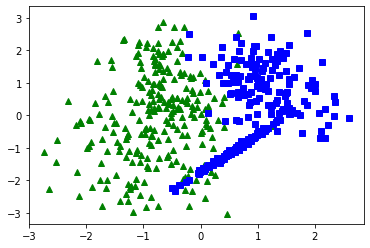

In [ ]:
from sklearn.datasets import make_classification
X_train, y_train = make_classification(n_samples=1000, n_features=4)
X_test=X_train[500:,]
y_test=y_train[500:,]
X_train=X_train[:500,]
y_train=y_train[:500,]

plt.figure()
plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "g^")
plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs")

We now train the model using (X_train, y_train). We initialize weight as a random vector, and b=0. We plot the loss convergence history. You should get the loss down to about 0.2.
We compute the prediction accuracy on (X_train, y_train). You should get an accuracy in the 80s. 

In [ ]:
# startWeight = np.random.rand(X_train.shape[1],1) 
# startBias = 0

In [ ]:
#Test 
#----------------------
# getZVal(X_train, startWeight, startBias).shape

In [ ]:
# model(startWeight, startBias, X_train).shape

In [ ]:
# loss(y_train, getZVal(X_train, startWeight, startBias))

In [ ]:
# gradients(X_train, y_train, model(startWeight, startBias, X_train))

0.493503961921634 1000
0.4748632833684977 999
0.4577423744459591 998
0.4420065152731024 997
0.4275321373710664 996
0.41420618623422917 995
0.40192547471351175 994
0.39059602724848186 993
0.3801324206598953 992
0.3704571300146298 991
0.36149988869342653 990
0.3531970709847986 989
0.3454911039516702 988
0.3383299134595418 987
0.33166640743566245 986
0.3254579978267179 985
0.31966616141546633 984
0.3142560386565456 983
0.309196068973559 982
0.30445766048151784 981
0.300014891813943 980
0.29584424359798966 979
0.2919243570950008 978
0.28823581757574523 977
0.28476096010393925 976
0.2814836955387943 975
0.27838935472289417 974
0.27546454898495715 973
0.27269704525069843 972
0.2700756542139881 971
0.2675901301715888 970
0.26523108126602296 969
0.2629898890116386 968
0.2608586360983152 967
0.2588300415757192 966
0.25689740261891725 965
0.2550545421641645 964
0.2532957617824863 963
0.2516157992290201 962
0.25000979016875824 961
0.2484732336350492 960
0.24700196082669665 959
0.2455921068933724 

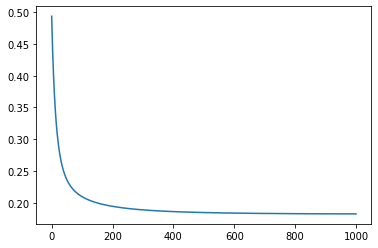

In [ ]:
#outputs an np array with m * 1 dimensions from a distribution of 0 - 1 
#np array with n rows of each feature.
startWeight = np.random.rand(X_train.shape[1],1) 
startBias = 0
newWeight, newBias, logLoss = train(startWeight, startBias, X_train, y_train, iter=1000, lr=0.1)
plt.figure()
plt.plot(logLoss)
print(f"Weight: {newWeight} \n Bias {newBias} ")
#training accuracy 
y_hat = model(newWeight,newBias,X_train)
print(f"accuracy: {accuracy(np.squeeze(y_train), predict(y_hat))}")

To see how well our model performs, we compute its accuracy on the testing dataset (X_test, y_test).

In [ ]:
y_hat = model(newWeight,newBias,X_test)
y_test=np.squeeze(y_test)
accuracy(y_test, predict(y_hat))

0.94

Now, we look at a real-world dataset. [The Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#) is available at UCI's Machine Learning Repository. Colab can read this dataset directly from [GitHub](https://github.com/madmashup/targeted-marketing-predictive-engine) using pandas package: pd.read_csv. The data is in the DataFrame format.

Common problems; after downloading the file from github. 
We will read te data in a CSV file


In [ ]:
url = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'
data = pd.read_csv(url)
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


This dataset is pretty large and cause my machine to crash. I remove some fileds. [This Webpage](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8) has a good description of this dataset. Note that you are not allowed to use any existing model such as those used in that Webpage for this homework.

In [ ]:
# X is a real vector. There are a lot of variables that are not numerical and we have 
# To change accordingly 
cat_vars=['default','education','contact','month','day_of_week',]
data=data.drop(cat_vars, axis=1)
print(list(data.columns))
print(data.shape)

['age', 'job', 'marital', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']
(41188, 16)


Some data columns have k class labels. This is best represented as k columns. 

In [ ]:
cat_vars=['job','marital','housing','loan','poutcome']
for va in cat_vars:
    #cat_pre='var'+'_'+var
    print(va)
    #print(data[va])
    cat_list = pd.get_dummies(data[va])
    data1=pd.concat([data,cat_list], axis=1)
    data=data1.drop(va, axis=1)
    #print(list(cat_list.columns))
    #print(list(data.columns))
    #print(data.shape)

print(data.shape)
print(list(data.columns))


job
marital
housing
loan
poutcome
(41188, 36)
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown', 'divorced', 'married', 'single', 'unknown', 'no', 'unknown', 'yes', 'no', 'unknown', 'yes', 'failure', 'nonexistent', 'success']


We now split the data into input data X and the label y. We covert them to numpy and split them into training and testing datasets with 30% for testing. 

In [ ]:
X = data.loc[:, data.columns != 'y']
#X=(X-X.mean())/X.std()
y = data.loc[:, data.columns == 'y']
columns = X.columns
X=X.to_numpy()
y=y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(columns)

(28831, 35)
(12357, 35)
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown', 'divorced', 'married', 'single', 'unknown', 'no', 'unknown',
       'yes', 'no', 'unknown', 'yes', 'failure', 'nonexistent', 'success'],
      dtype='object')


Now, train and test as before. 

In [ ]:
startWeight = np.random.rand(X_train.shape[1],1) 
startBias = 0

In [ ]:
getZVal(X_train, startWeight, startBias).shape

(28831,)

In [ ]:
print(model(startWeight, startBias, X_train))

[1. 1. 1. ... 1. 1. 1.]


In [ ]:
y_train.squeeze().shape

(28831,)

In [ ]:
bt, wt= gradients(X_train, y_train.squeeze(), model(startWeight, startBias, X_train))

In [ ]:
wt.shape

(35, 1)

[5253.58926514] 1000
26725.53504772001 999


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


23276.236551045855 998
19826.938054371793 997
16377.639557697647 996
12928.341061023584 995
9479.042564349498 994
6029.7440676753895 993
2580.445571001288 992
5668.824202624623 991
26528.066343207945 990
23078.767846533818 989
19629.46934985973 988
16180.170853185618 987
12730.872356511549 986
9281.57385983744 985
5832.275363163343 984
2383.129991114644 983
6075.148249771699 982
26331.775453443846 981
22882.476956769664 980
19433.178460095634 979
15983.879963421537 978
12534.581466747433 977
9085.28297007329 976
5635.9844733991995 975
2189.6536401547355 974
6376.374667494559 973
26149.151402847314 972
22699.8529061731 971
19250.554409499055 970
15801.255912824987 969
12351.957416150857 968
8902.658919476753 967
5453.360422802646 966
2014.1710317683717 965
6504.872053969929 964
25988.73793521439 963
22539.43943854026 962
19090.14094186608 961
15640.842445192011 960
12191.543948517958 959
8742.245451843828 958
5293.653474272981 957
1870.9878782191915 956
6193.711236549302 955
25884.62603

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


accuracy: 0.5886372307585584


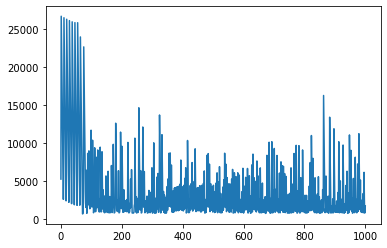

In [ ]:
startWeight = np.random.rand(X_train.shape[1],1) 
startBias = 1000
newWeight, newBias, logLoss = train(startWeight, startBias, X_train, y_train, iter=1000, lr=0.01)
plt.figure()
plt.plot(logLoss)
print(f"Weight: {newWeight} \n Bias {newBias} ")
#training accuracy 
y_hat = model(newWeight,newBias,X_train)
print(f"accuracy: {accuracy(np.squeeze(y_train), predict(y_hat))}")

In [ ]:
y_hat = model(newWeight,newBias,X_test)
y_test=np.squeeze(y_test)
accuracy(y_test, predict(y_hat))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0.5795095897062393

Example from kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle kernels output bijenmanandhar/diabetes-prediction-using-logistic-regression 


Kernel log downloaded to /content/diabetes-prediction-using-logistic-regression.log 


In [ ]:
read = pd.read_csv("diabetes-prediction-using-logistic-regression.log")
read

[{"stream_name":"stdout"  ... data:"\u003cclass 'pandas.core.frame.DataFrame'\u003e\n"}
NaN {"stream_name":"stdout"         time:12.57459854  ...                                       0 to 767\n"}       
    {"stream_name":"stdout"        time:12.574606776  ...                                                NaN       
    {"stream_name":"stdout"        time:12.574612037  ...                                                NaN       
    {"stream_name":"stdout"        time:12.574617369  ...                                                NaN       
    {"stream_name":"stdout"        time:12.574623947  ...                                                NaN       
...                                              ...  ...                                                ...       
    {"stream_name":"stderr"        time:39.721134601  ...                                                NaN       
    {"stream_name":"stderr"        time:39.722144223  ...                                                NaN       
    {"stream_name":"stderr"        time:39.722400763  ...                                                NaN       
    {"stream_name":"stderr"        time:39.722625131  ...                                                NaN       
]   NaN                                          NaN  ...                                                NaN       

[67 rows x 3 columns]